In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import os
import warnings
warnings.filterwarnings("ignore")
sns.set()

In [2]:
df=pd.read_csv("news.csv")

In [3]:
df.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillaryâ€™s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"â€” Kaydee King (@KaydeeKing) November 9, 2016...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [22]:
df.shape

(1009, 4)

In [23]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [24]:
# label encoding used for convert categorical variable to binary 
df["Label"]=le.fit_transform(df["label"])

In [25]:
# Get Independent features
X=df.drop(['label', 'Label'], axis = 1)


In [26]:
X.head()

,Unnamed: 0,title,text
0,8476,You Can Smell Hillaryâ€™s Fear,"Daniel Greenfield, a Shillman Journalism Fello..."
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...
3,10142,Bernie supporters on Twitter erupt in anger ag...,"â€” Kaydee King (@KaydeeKing) November 9, 2016..."
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...


In [27]:
y=df["Label"]

In [28]:
y.head()

0    101
1    101
2    102
3    101
4    102
Name: Label, dtype: int32

In [ ]:
# (COUNTVECTORIZER) - the most straightfoward one it count the number of times a token shows up in the document and uses this 
# values as its weight


# (HASH VECTORIZER) - this one is designed to be as memory efficient as possible. instead of storing the tokens as strings the
# vectorizer applies the hashing trick to encode them as  numerical indexes the downside of this method is that once vectorized
# the features names can no longer be retieved

# (TF-IDF VECTORIZER) - its stand for term frequency inverse documents frequency meaning the weight assigned to each token 
# not only depends on its frequency in a documents but also how recurrent that term  is in the entire corpora more on that here



In [29]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer

In [30]:
df=df.dropna()

In [31]:
messages=df.copy()

In [32]:
# resting indexing because of null values they make changes in indeing
messages.reset_index(inplace=True)

In [33]:
messages.head()

,index,Unnamed: 0,title,text,label,Label
0,0,8476,You Can Smell Hillaryâ€™s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE,101
1,1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE,101
2,2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL,102
3,3,10142,Bernie supporters on Twitter erupt in anger ag...,"â€” Kaydee King (@KaydeeKing) November 9, 2016...",FAKE,101
4,4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL,102


In [34]:
messages["title"][6]

'Girl Horrified At What She Watches Boyfriend Do After He Left FaceTime On'

In [35]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [36]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [37]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re
ps = PorterStemmer()
corpus = []
for i in range(0, len(messages)):
    review = re.sub('[^a-zA-Z]', ' ', messages['text'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [38]:
corpus[3]

'kayde king kaydeek novemb lesson tonight dem loss time democrat start listen voter stop run establish candid peopl berni peopl berni novemb dem want tight race work berni walker bragman walkerbragman novemb new york time columnist paul krugman one hillari clinton outspoken surrog contenti democrat primari blame clinton poor perform green parti candid jill stein far receiv neglig number vote nation say stein ralph nader prevent clinton victori account berniesteach threw krugman analysi back face candid issu take respons http co khyouusrf teacher berni berniesteach novemb ana navarro republican recent endors hillari clinton sum preposter natur presidenti elect tweet gop nomin damn candid could lose hillari clinton democrat nomin damn candid could lose trump ana navarro ananavarro novemb popular left wing facebook page pro sander primari respond trump surg simpli post meme sander face text could avoid thank noth dnc meme share almost time less hour post tuesday novemb berni sander endors

In [39]:
## TFidf Vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_v=TfidfVectorizer(max_features=5000,ngram_range=(1,3))
X=tfidf_v.fit_transform(corpus).toarray()

In [40]:
X.shape

(793, 5000)

In [41]:
y=messages['label']

In [42]:
## Divide the dataset into Train and Test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

In [43]:
tfidf_v.get_feature_names()[:20]

['abaaoud',
 'abandon',
 'abc',
 'abc news',
 'abc poll',
 'abedin',
 'abil',
 'abl',
 'abort',
 'abroad',
 'absenc',
 'absent',
 'absolut',
 'absurd',
 'abus',
 'academ',
 'academi',
 'acceler',
 'accept',
 'access']

In [44]:
tfidf_v.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.float64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'norm': 'l2',
 'preprocessor': None,
 'smooth_idf': True,
 'stop_words': None,
 'strip_accents': None,
 'sublinear_tf': False,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'use_idf': True,
 'vocabulary': None}

In [45]:
count_df = pd.DataFrame(X_train, columns=tfidf_v.get_feature_names())

In [46]:
count_df.head()

,abaaoud,abandon,abc,abc news,abc poll,abedin,abil,abl,abort,abroad,...,young peopl,younger,youth,youtub,youtub channel,ypg,zero,zionist,zone,zuckerberg
0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.00000,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.00000,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.00000,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.02835,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.029059,0.0,0.00000,0.0,...,0.0,0.0,0.018598,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [47]:
import matplotlib.pyplot as plt

In [48]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

## MultinomialNB Algorithm

In [49]:
from sklearn.naive_bayes import MultinomialNB
classifier=MultinomialNB()

In [50]:
from sklearn import metrics
import numpy as np
import itertools

accuracy:   0.752
Confusion matrix, without normalization


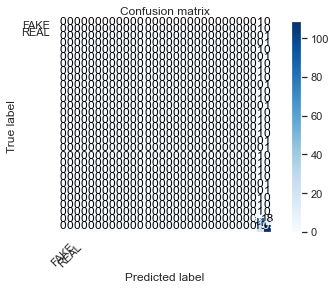

In [51]:
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [52]:
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
score

0.7519083969465649

In [53]:
y_train.shape

(531,)

## Passive Aggressive Classifier Algorithm

In [54]:
from sklearn.linear_model import PassiveAggressiveClassifier
linear_clf = PassiveAggressiveClassifier()

accuracy:   0.779
Confusion matrix, without normalization


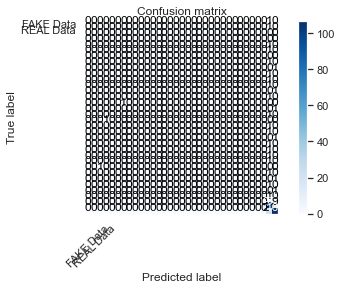

In [55]:
linear_clf.fit(X_train, y_train)
pred = linear_clf.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE Data', 'REAL Data'])

## Multinomial Classifier with Hyperparameter

In [56]:
classifier=MultinomialNB(alpha=0.1)

In [57]:
previous_score=0
for alpha in np.arange(0,1,0.1):
    sub_classifier=MultinomialNB(alpha=alpha)
    sub_classifier.fit(X_train,y_train)
    y_pred=sub_classifier.predict(X_test)
    score = metrics.accuracy_score(y_test, y_pred)
    if score>previous_score:
        classifier=sub_classifier
    print("Alpha: {}, Score : {}".format(alpha,score))

Alpha: 0.0, Score : 0.7709923664122137
Alpha: 0.1, Score : 0.7404580152671756
Alpha: 0.2, Score : 0.7404580152671756
Alpha: 0.30000000000000004, Score : 0.7442748091603053
Alpha: 0.4, Score : 0.732824427480916
Alpha: 0.5, Score : 0.7404580152671756
Alpha: 0.6000000000000001, Score : 0.7366412213740458
Alpha: 0.7000000000000001, Score : 0.7480916030534351
Alpha: 0.8, Score : 0.7519083969465649
Alpha: 0.9, Score : 0.7519083969465649


In [58]:
## Get Features names
feature_names = tfidf_v.get_feature_names()

In [59]:
classifier.coef_[0]

array([-8.51792215, -8.51792215, -8.51792215, ..., -8.51792215,
       -8.51792215, -8.51792215])

In [60]:
### Most real
sorted(zip(classifier.coef_[0], feature_names), reverse=True)[:20]

[(-8.06712978482593, 'quantum'),
 (-8.199786982126685, 'scienc'),
 (-8.220249059300704, 'york time'),
 (-8.220249059300704, 'new york time'),
 (-8.224897591185348, 'studi'),
 (-8.269429094881156, 'suggest'),
 (-8.275638895304867, 'action'),
 (-8.285226359975605, 'york'),
 (-8.285226359975605, 'new york'),
 (-8.28628465249632, 'real'),
 (-8.362769459393622, 'new'),
 (-8.370078981938176, 'time'),
 (-8.517922147254286, 'zuckerberg'),
 (-8.517922147254286, 'zone'),
 (-8.517922147254286, 'zionist'),
 (-8.517922147254286, 'zero'),
 (-8.517922147254286, 'ypg'),
 (-8.517922147254286, 'youtub channel'),
 (-8.517922147254286, 'youtub'),
 (-8.517922147254286, 'youth')]

In [61]:
### Most fake
sorted(zip(classifier.coef_[0], feature_names))[:5000]

[(-8.517922147254286, 'abaaoud'),
 (-8.517922147254286, 'abandon'),
 (-8.517922147254286, 'abc'),
 (-8.517922147254286, 'abc news'),
 (-8.517922147254286, 'abc poll'),
 (-8.517922147254286, 'abedin'),
 (-8.517922147254286, 'abil'),
 (-8.517922147254286, 'abl'),
 (-8.517922147254286, 'abort'),
 (-8.517922147254286, 'abroad'),
 (-8.517922147254286, 'absenc'),
 (-8.517922147254286, 'absent'),
 (-8.517922147254286, 'absolut'),
 (-8.517922147254286, 'absurd'),
 (-8.517922147254286, 'abus'),
 (-8.517922147254286, 'academ'),
 (-8.517922147254286, 'academi'),
 (-8.517922147254286, 'acceler'),
 (-8.517922147254286, 'accept'),
 (-8.517922147254286, 'access'),
 (-8.517922147254286, 'access pipelin'),
 (-8.517922147254286, 'accid'),
 (-8.517922147254286, 'accident'),
 (-8.517922147254286, 'accommod'),
 (-8.517922147254286, 'accompani'),
 (-8.517922147254286, 'accomplish'),
 (-8.517922147254286, 'accord'),
 (-8.517922147254286, 'accord new'),
 (-8.517922147254286, 'accord report'),
 (-8.51792214725

In [ ]:
NOW FOR THE FURTHER PPT MY BUDDY PANKAJ WILL TAKE OVER 